# COMP6200 Portfolio 2

## Goals:
+ to reproduce some work on predicting the energy usage of a house based on Internet of Things (IoT) measurements of temperature and humidity and weather observations
+ Data driven prediction models of energy use of appliances in a low-energy house
+ need to report linear regression model results both on training and testing set


## Tasks
The portfolio should contain at least:

1.  An exploration of the data showing the distribution of values of variables that matches some of the plots shown in the first part of the paper. 
2.  Fitting a linear model to the data and generating evaluation metrics (mean squared error, R2) 
3.  Use the sklearn RFE function to apply Recursive Feature Estimation to the data to select the best features, compare with the results described in the paper for the same operation. Compare your results with those in the paper.

In [1]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

#### *1. An exploration of the data showing the distribution of values of variables that matches some of the plots shown in the first part of the paper*

In [2]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [3]:
train.shape

(14803, 32)

In [4]:
test.shape

(4932, 32)

In [5]:
# Check for missing value:
train.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [6]:
test.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [7]:
test.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [8]:
train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [9]:
# train.iloc[:,1:2]

In [10]:
train['MinTempt'] = train.iloc[:,1:2]
train['MaxTempt'] = train.iloc[:,2:3]
train.shape
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,MinTempt,MaxTempt
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday,60,30
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday,60,30
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday,50,30
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday,60,40
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday,50,40


In [11]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,MinTempt,MaxTempt
count,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,...,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000
mean,98.011214,3.802608,21.684167,40.271439,20.342506,40.418056,22.262628,39.249149,20.855433,39.030359,...,755.502983,79.734122,4.034470,38.330141,3.756859,25.078087,25.078087,42985.989326,98.011214,3.802608
std,102.828019,7.940340,1.607780,3.981741,2.191842,4.066223,2.013785,3.252755,2.044786,4.339783,...,7.427684,14.955609,2.436870,11.812780,4.200297,14.481537,14.481537,24968.649028,102.828019,7.940340
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.893333,17.200000,28.766667,15.100000,27.660000,...,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,10.000000,0.000000
25%,50.000000,0.000000,20.730000,37.361667,18.823333,37.900000,20.790000,36.900000,19.500000,35.530000,...,750.866667,70.000000,2.000000,29.000000,0.900000,12.580425,12.580425,21600.000000,50.000000,0.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,756.100000,83.666667,3.666667,40.000000,3.450000,25.043993,25.043993,43200.000000,60.000000,0.000000
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.290000,23.290000,41.761667,22.100000,42.130000,...,760.933333,91.666667,5.500000,40.000000,6.533333,37.665907,37.665907,64800.000000,100.000000,0.000000
max,1080.000000,50.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.063333,...,772.300000,100.000000,13.500000,66.000000,15.500000,49.996530,49.996530,85800.000000,1080.000000,50.000000


In [12]:
test.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
count,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,...,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000
mean,96.745742,3.799676,21.693788,40.224623,20.337357,40.427517,22.282566,39.222545,20.855039,39.016532,...,41.583421,7.407604,755.581486,79.799329,4.055605,38.332911,3.772257,24.717745,24.717745,42670.437956
std,101.614097,7.923715,1.601049,3.972156,2.196585,4.080973,1.983027,3.260285,2.037373,4.346357,...,4.153739,5.298588,7.314446,14.737631,2.493979,11.741537,4.178050,14.539974,14.539974,24854.920715
min,10.000000,0.000000,16.790000,27.430000,16.100000,20.463333,17.200000,30.926667,15.100000,28.856667,...,29.166667,-4.955556,729.500000,25.000000,0.000000,1.000000,-6.500000,0.013539,0.013539,0.000000
25%,50.000000,0.000000,20.765625,37.290000,18.790000,37.900000,20.790000,36.863333,19.566667,35.500000,...,38.626071,3.700000,751.050000,70.833333,2.000000,29.000000,0.912500,12.338689,12.338689,21000.000000
50%,60.000000,0.000000,21.600000,39.660000,20.000000,40.500000,22.100000,38.530000,20.600000,38.400000,...,41.000000,6.950000,756.100000,83.666667,3.666667,40.000000,3.400000,24.490895,24.490895,42000.000000
75%,100.000000,0.000000,22.666667,42.975000,21.500000,43.160833,23.367500,41.760000,22.100000,42.170833,...,44.290000,10.416667,760.900000,91.500000,5.500000,40.000000,6.683333,37.374912,37.374912,64200.000000
max,1070.000000,70.000000,26.260000,56.393333,29.666667,54.766667,29.100000,50.090000,26.200000,51.090000,...,53.326667,26.100000,772.283333,100.000000,14.000000,66.000000,15.316667,49.993173,49.993173,85800.000000


#### *1.1. Distributions of some key value variables: Appliances, Lights, WindSpeed, Press_mm_hg, NSM*

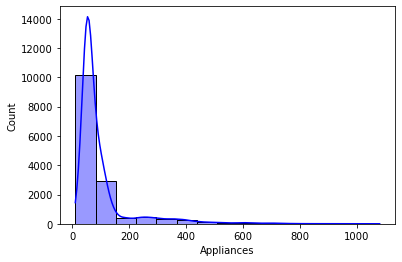

In [13]:
sns.histplot(data = train['Appliances'],color = 'blue',
alpha = 0.4, bins = 15, kde = True)
plt.show()

The distribution of ***Appliances*** is right skewed

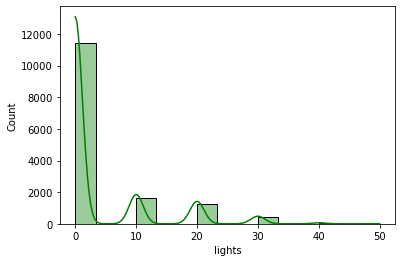

In [14]:
sns.histplot(data = train['lights'],color = 'green',
alpha = 0.4, bins = 15, kde = True)
plt.show()

Look at the graph above, we can see that ***lights*** is skewed right

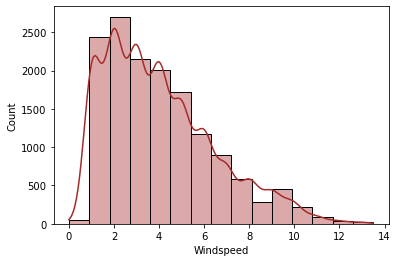

In [15]:
sns.histplot(data = train['Windspeed'],color = 'brown',
alpha = 0.4, bins = 15, kde = True)
plt.show()

The distribution of ***Windspeed*** is right skewed

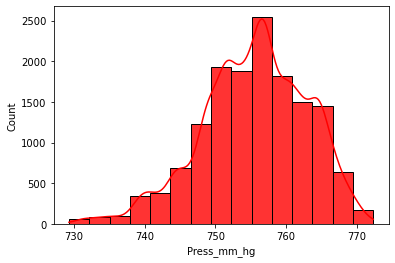

In [16]:
sns.histplot(data = train['Press_mm_hg'],color = 'red',
alpha = 0.8, bins = 15, kde = True)
plt.show()

 ***Press_mm_hg*** is normaly distributed

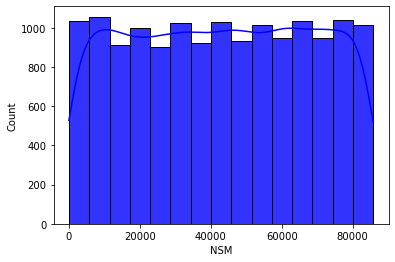

In [17]:
sns.histplot(data = train['NSM'],color = 'blue',
alpha = 0.8, bins = 15, kde = True)
plt.show()

***NMN*** is normally distributed

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14803 non-null  object 
 1   Appliances   14803 non-null  int64  
 2   lights       14803 non-null  int64  
 3   T1           14803 non-null  float64
 4   RH_1         14803 non-null  float64
 5   T2           14803 non-null  float64
 6   RH_2         14803 non-null  float64
 7   T3           14803 non-null  float64
 8   RH_3         14803 non-null  float64
 9   T4           14803 non-null  float64
 10  RH_4         14803 non-null  float64
 11  T5           14803 non-null  float64
 12  RH_5         14803 non-null  float64
 13  T6           14803 non-null  float64
 14  RH_6         14803 non-null  float64
 15  T7           14803 non-null  float64
 16  RH_7         14803 non-null  float64
 17  T8           14803 non-null  float64
 18  RH_8         14803 non-null  float64
 19  T9  

In [19]:
train['date'] = pd.to_datetime(train['date']) # convert object to date 
train['weekday'] = train['date'].dt.dayofweek
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['month_year'] = train['date'].dt.to_period('M')
train

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv2,NSM,WeekStatus,Day_of_week,MinTempt,MaxTempt,weekday,month,year,month_year
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,13.275433,61200,Weekday,Monday,60,30,0,1,2016,2016-01
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.606195,61800,Weekday,Monday,60,30,0,1,2016,2016-01
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,28.642668,62400,Weekday,Monday,50,30,0,1,2016,2016-01
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,10.084097,63600,Weekday,Monday,60,40,0,1,2016,2016-01
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,44.919484,64200,Weekday,Monday,50,40,0,1,2016,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,...,18.248201,61200,Weekday,Friday,110,0,4,5,2016,2016-05
14799,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,...,16.966162,61800,Weekday,Friday,90,0,4,5,2016,2016-05
14800,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,49.282940,63000,Weekday,Friday,90,0,4,5,2016,2016-05
14801,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,6.322784,64200,Weekday,Friday,420,10,4,5,2016,2016-05


In [20]:
import seaborn  as sns
train_month = train.groupby(['month_year','month','year']).agg({'Appliances':'sum'}).reset_index()
# train_month['y'] = train_month['month']
train_month

,month_year,month,year,Appliances
0,2016-01,1,2016,209600
1,2016-02,2,2016,321280
2,2016-03,3,2016,322210
3,2016-04,4,2016,322930
4,2016-05,5,2016,274840


In [21]:
import seaborn  as sns
train_weekday = train.groupby(['weekday']).agg({'Appliances':'sum'}).reset_index()
# train_month['y'] = train_month['month']
train_weekday

,weekday,Appliances
0,0,235300
1,1,187180
2,2,194090
3,3,194830
4,4,224190
5,5,217010
6,6,198260


In [22]:
train['datetime']=pd.to_datetime(train["date"])
train['datepart']=train['datetime'].dt.date

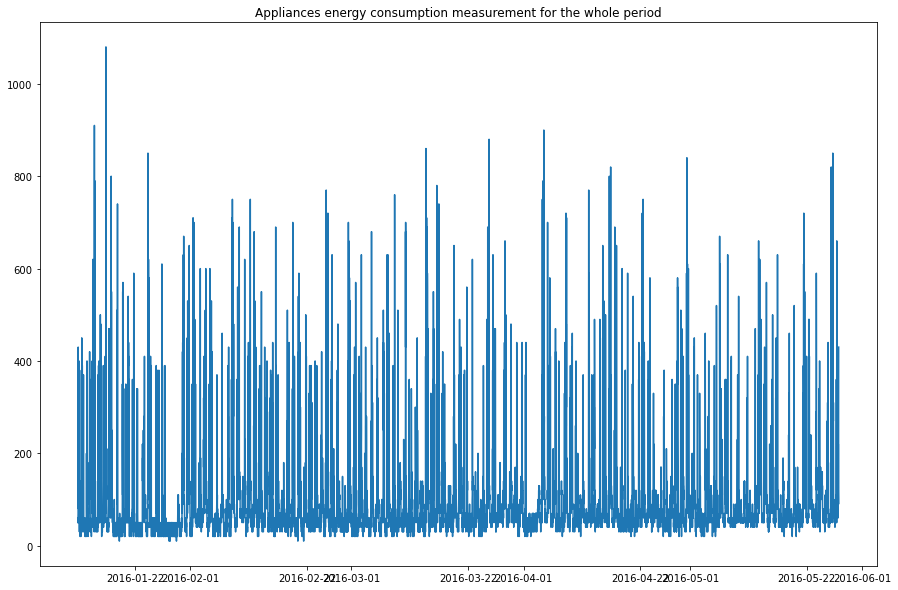

In [23]:
train['date']=pd.to_datetime(train['date'])
train['month'] = train['date'].dt.month
plt.figure(figsize=(15,10))
plt.plot(train["date"], train["Appliances"])
plt.title('Appliances energy consumption measurement for the whole period')
plt.show()

<ipython-input-24-cfd3a34b2688>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weeknumber=train['date'].dt.week


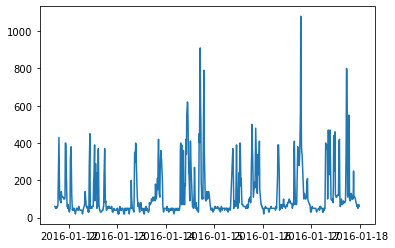

In [24]:
weeknumber=train['date'].dt.week
week1=train[weeknumber==min(weeknumber)]
plt.plot(week1['date'], week1['Appliances'])
plt.show()

<AxesSubplot:title={'center':'Distribution of load for 10 minute intervals'}, xlabel='Appliances Wh', ylabel='Number of 10 minute intervals'>

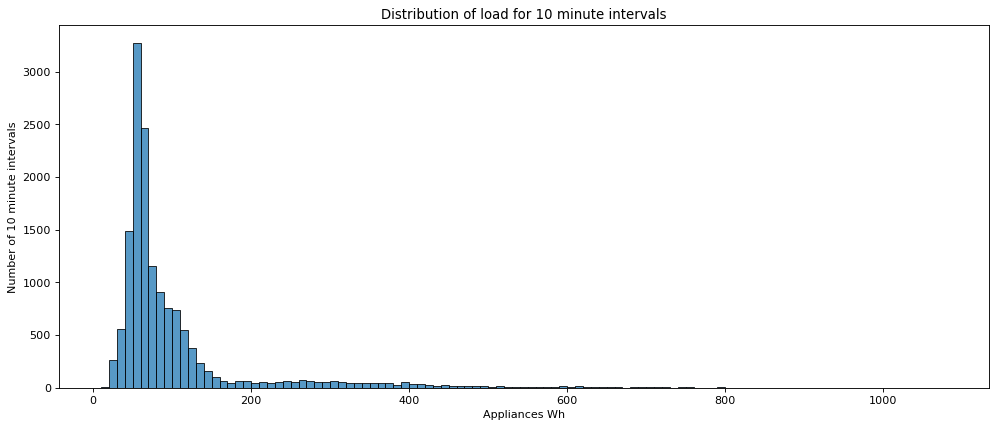

In [25]:

fig = plt.figure(figsize=(15, 6), dpi=80)
ax1 = fig.add_subplot()
ax1.set_xlabel('Appliances Wh')
ax1.set_ylabel('Number of 10 minute intervals')
ax1.set_title('Distribution of load for 10 minute intervals')
sns.histplot(data=train,x='Appliances',binwidth=10)

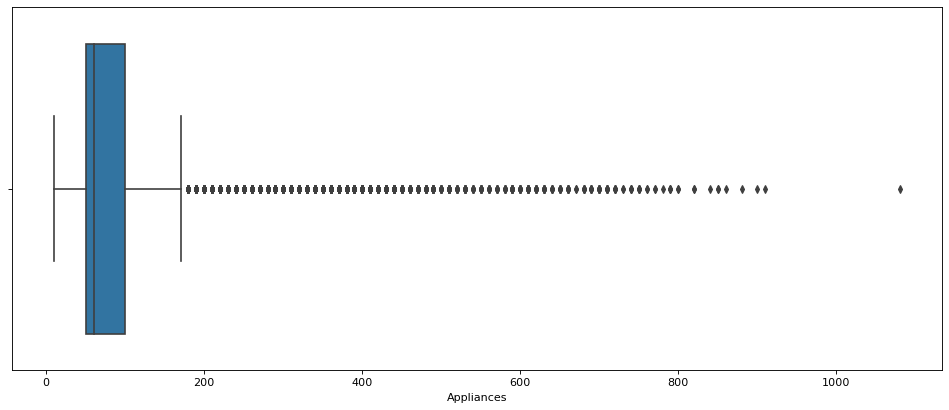

In [26]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax2 = fig.add_subplot()
ax2.set_xlabel('Appliances Wh')
ax2.set_title('')
sns.boxplot(data=train,x='Appliances',ax=ax2)
plt.show()

In [27]:
#we need to create dummy variables for weekday/weekend variable.
weekstatus_df=pd.get_dummies(train['WeekStatus'])

In [28]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = py.corrcoef(x, y)[0][1]
    # Make the label
    label = str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.5), size = 50, xycoords = ax.transAxes)

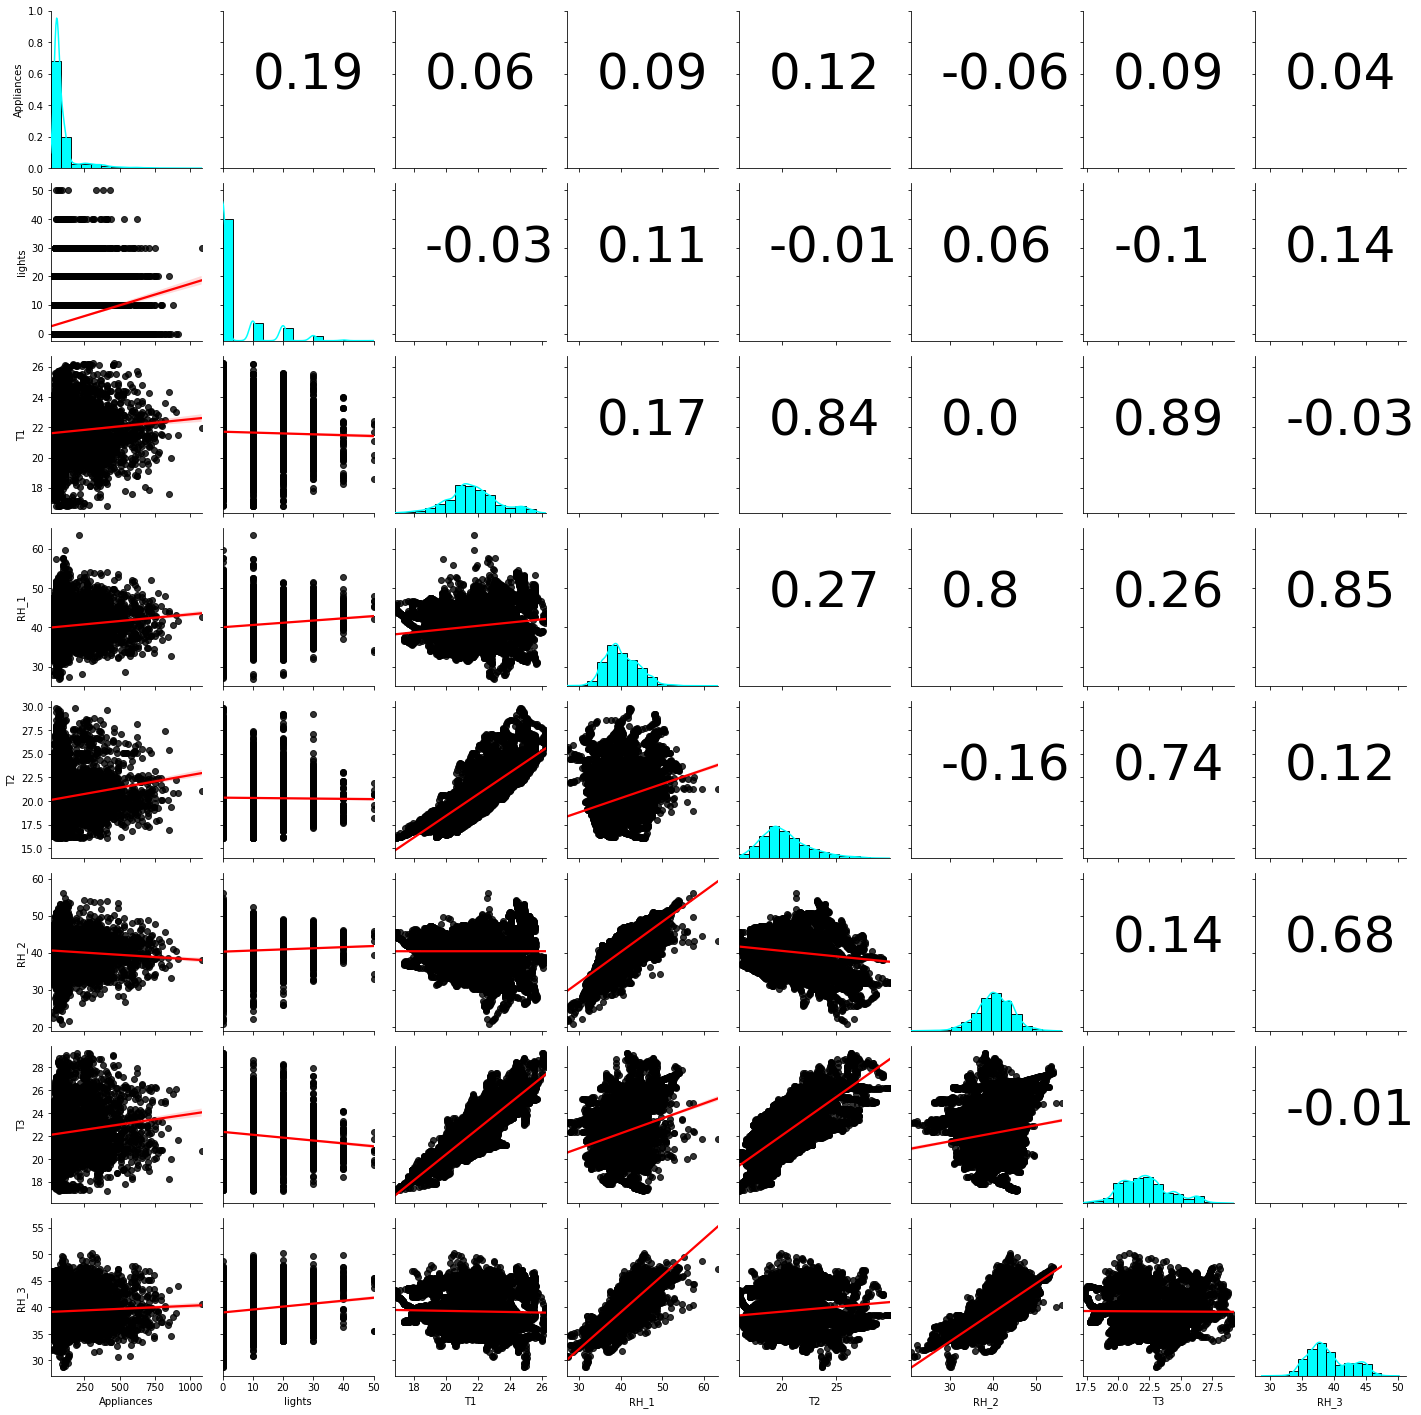

In [29]:
grid = sns.PairGrid(data= train, vars =["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3"])
grid = grid.map_diag(sns.histplot,color = 'cyan',alpha = 1, bins = 15, kde = True)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})


From the Pairs plot above, we can see the relationship between the energy consumption of appliances with: lights, T1, RH1, T2, RH2, T3, RH3. T1 and RH1 correspond to the kitchen conditions; T2 and RH2 correspond to the living room conditions. In addtion, the temperatures and Humidities are highly correlated within the house. 

In [30]:
train['datetime']=pd.to_datetime(train["date"])
train['datepart']=train['datetime'].dt.date

In [31]:
#summarise by hour for heatmap of usage
train['hour of day']=train['datetime'].dt.hour
train['weekday']=train['datetime'].dt.weekday
train['week']=train['datetime'].dt.isocalendar().week.astype(int)
train['year']=train['datetime'].dt.isocalendar().year
appliancehr=train[['Appliances','year','week','weekday','Day_of_week','hour of day']]
appliancesum=appliancehr.groupby(['year','week','weekday','Day_of_week','hour of day'])[["Appliances"]].sum()
max, min = appliancesum.max(), appliancesum.min()
table = pd.pivot_table(appliancesum.loc[(2016, 3):(2016, 6)], values='Appliances', index=['week','hour of day'],
                    columns=['weekday','Day_of_week'], aggfunc=py.sum)

In [32]:
table.shape

(96, 7)

In [33]:
table.info

<bound method DataFrame.info of weekday               0       1         2        3      4        5      6
Day_of_week      Monday Tuesday Wednesday Thursday Friday Saturday Sunday
week hour of day                                                         
3    0              270     280       190      200    120      170    130
     1              210     270       190      270    170      140    260
     2              210     150       190      180    200      170    190
     3              200     280       210      300    240      190    270
     4              270     150       200      240    130       60    150
...                 ...     ...       ...      ...    ...      ...    ...
6    19             770    1560       560      500    420      980    980
     20             520     750       770      370    610      320    900
     21             340     810       620      380    620      360    520
     22             340     590       490      360    300      310    530
     2

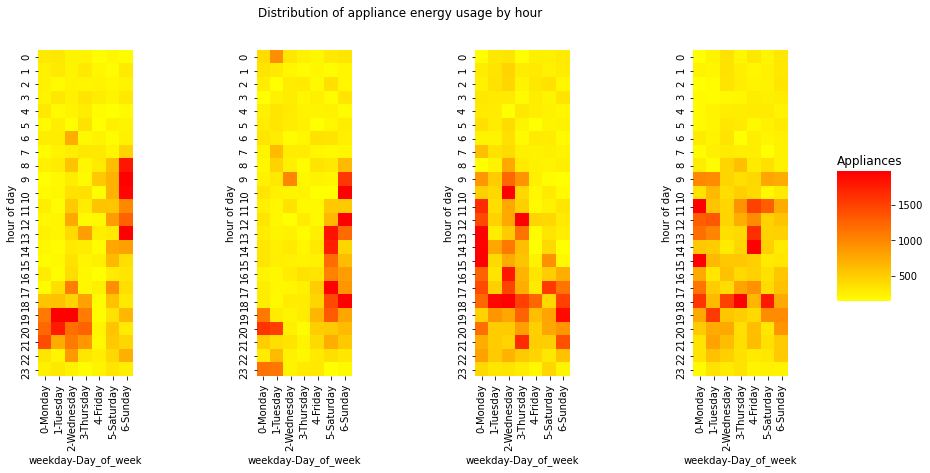

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(15, 6))
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
cbar_ax = fig.add_axes([.905, .3, .05, .3])
cbar_ax.set_title('Appliances', loc='left')
fig.suptitle('Distribution of appliance energy usage by hour')
xticklabs={'Mon','Tue','Wed','Thu','Fri','Sat','Sun'}
sns.heatmap(cmap='autumn_r',data=table.loc[(3)],square=True,robust=True,ax=ax1,cbar_ax=cbar_ax)
sns.heatmap(cmap='autumn_r',data=table.loc[(4)],square=True,robust=True,ax=ax2,cbar_ax=cbar_ax)
sns.heatmap(cmap='autumn_r',data=table.loc[(5)],square=True,robust=True,ax=ax3,cbar_ax=cbar_ax)
sns.heatmap(cmap='autumn_r',data=table.loc[(6)],square=True,robust=True,ax=ax4,cbar_ax=cbar_ax)
plt.show()


Look at the chart above, we can see that:
+ the pattern of low energy usage before 7am
+ the pattern of high energy usage from 8am to 10am in some days of week such as monday, sunday. Besides this, the the energy usage also high from 18.30pm to 21pm in almost day

#### *2.Fitting a linear model to the data and generating evaluation metrics (mean squared error, R2)* 

In [35]:
import sklearn
from sklearn import linear_model
regression = linear_model.LinearRegression()
x_train = train.loc[:,'lights':'rv2']
y_train = train['Appliances']

regression.fit(x_train, y_train)
print("The Linear Equation is Y = X *", regression.coef_, "+", regression.intercept_)

The Linear Equation is Y = X * [ 1.94230390e+00 -2.40341397e+00  1.51385291e+01 -1.75319924e+01
 -1.38312029e+01  2.70553013e+01  5.47766249e+00 -2.83799210e+00
 -1.99627755e-01 -1.11479337e+00  1.73873984e-01  6.94784663e+00
  3.31249351e-01  1.93219597e+00 -1.78244526e+00  8.88733259e+00
 -4.56785734e+00 -1.58988788e+01 -1.06717367e+00 -1.02453635e+01
  1.79371342e-01 -1.11984275e+00  1.75289214e+00  1.33556832e-01
  5.41219014e+00 -2.51078307e-02 -2.51078307e-02] + 15.002183915874085


In [36]:
import numpy as np
predicted_value=regression.predict(x_train)
meansqerror = ((np.array(y_train)-predicted_value)**2).sum()/len(y_train)
print("Mean Square Error is", meansqerror)

Mean Square Error is 8781.372915445201


As we take a square, all errors are positive, and mean is positive indicating there is some difference in estimates and actual. Lower mean indicates forecast is closer to actual.

In [37]:
from sklearn.metrics import r2_score
RSquare = r2_score(y_train, predicted_value)
print("R Squared Value is", RSquare)

R Squared Value is 0.16944419268927147


It means that around 16.9% of the variation of ***train*** is completely explained by the other

#### *3.Use the sklearn RFE function to apply Recursive Feature Estimation to the data to select the best features, compare with the results described in the paper for the same operation. Compare your results with those in the paper*

In [38]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.svm import SVR

C:\Users\melis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Optimal number of features : 17


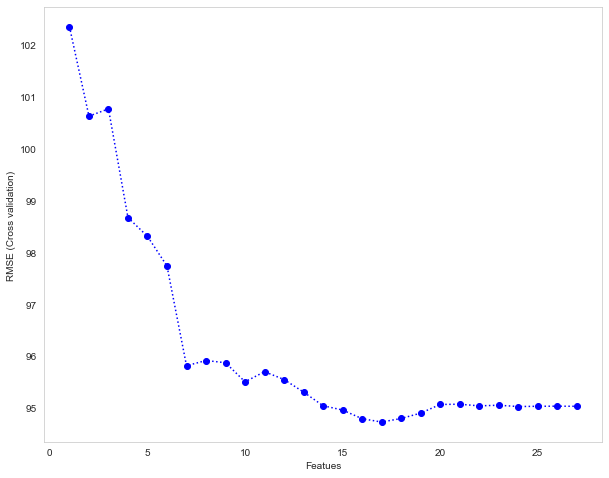

In [39]:
# Create the RFE object and compute a cross-validated score.
reg =linear_model.LinearRegression()
min_features_to_select = 1  
rfecv = RFECV(estimator=reg, step=1, cv=StratifiedKFold(10),
              scoring='neg_root_mean_squared_error',
              min_features_to_select=min_features_to_select)
rfecv.fit(x_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
sns.set_style("whitegrid", {'axes.grid':False})
plt.figure(figsize=(10,8))
plt.xlabel("Featues")
plt.ylabel("RMSE (Cross validation) ")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         -rfecv.grid_scores_,'ob:')
plt.show()

## Finished Portofolio 2